# Programming Assignment: Polynomial fit with a regularization
## Name : 백찬희
## Student ID : 20142503
## Github : https://github.com/Baekchanhee/assignment12.git

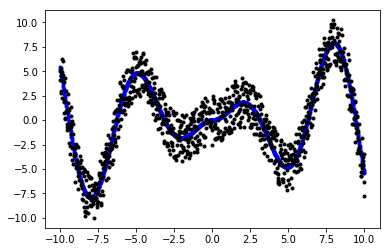

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

## Minimize   $||A\theta - y||^2 + \lambda ||\theta||^2$  => reshape it to least square problem $ ||A'\theta - y'||^2 $

$ A' =  \begin{bmatrix}
  A \\
  \sqrt{\lambda}I 
 \end{bmatrix} $

$ y' =  \begin{bmatrix}
  y \\
  0 
 \end{bmatrix} $

In [10]:
import math
# A'
def A(p, x, lamb):  # p = 0,1,2,3,...,9
     
    a = np.ones(num)
    x1 = x
    for i in range(p):
        a = np.c_[a, x1]
        x1 = x1 * x     
    lam = math.sqrt(lamb)    
    i = np.eye(p+1, dtype=int)
    i = lam * i
    a = np.vstack((a, i))

    return a

###  $\theta = (A'^TA')^{-1}A'^Ty'$

In [15]:
def O(A):
    AT = np.transpose(A)                  # transpose of A
    if(AT.ndim != 1) : 
        o = np.linalg.inv((np.matmul(AT, A))) # inverse of (transpose of A * A)
        o = np.matmul(o, AT)    
    else :                          # p = 0 이라 1차원 배열일때 inverse 대신 역수
        o = 1 / (np.matmul(AT, A))
        o = o * AT        
    zeros = np.zeros(A.shape[1])
    y = np.hstack((y2, zeros))
    o = np.matmul(o, y)
    return o

#o = O(a)
#o


## model : $\hat{f}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^2 + .... + \theta_{p}x^p $

In [27]:
def model(p, x, lamb): 
    a = A(p, x, lamb)    
    o = O(a)
    
    
    
    if o.ndim == 0 :  # p = 0 일때
        md = a * o
    else :
        md  = np.matmul(a, o)
    return md, o

## energy : $\Sigma_{j=1}^{n}r^2_{j}  + \lambda ||\theta||^2  $   where   $r_{j} = y_{j} - \hat{f}(x_{j}) $

In [30]:
def energy(md, mdparam):
    
    r2 = (y2 - md[0:1001]) ** 2 # r의 제곱
    s = np.sum(r2)         # error
    r = np.sum(mdparam ** 2)   # regularization
    return s+r

## p = 6 ~ p = 15 까지 plot  $\lambda = 1$일때

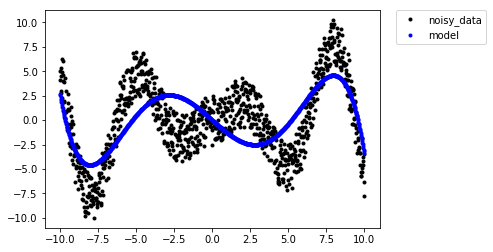

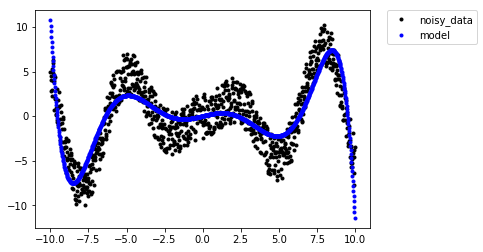

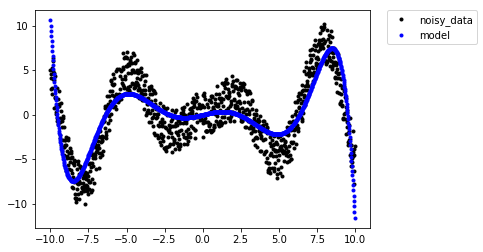

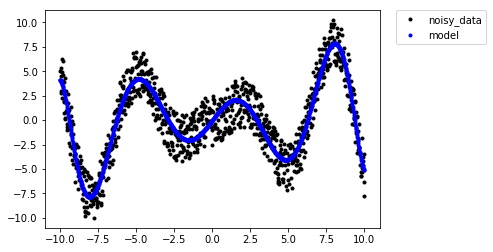

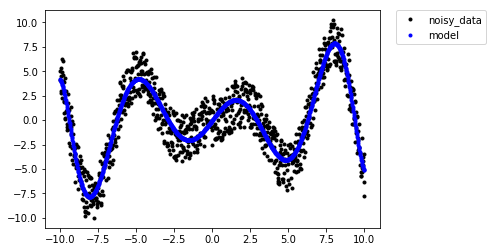

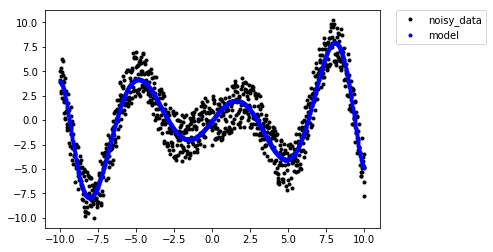

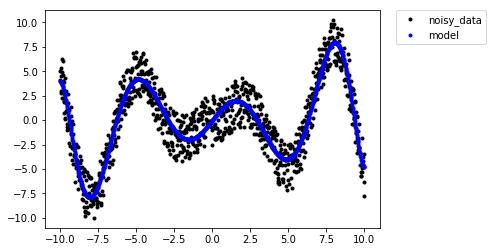

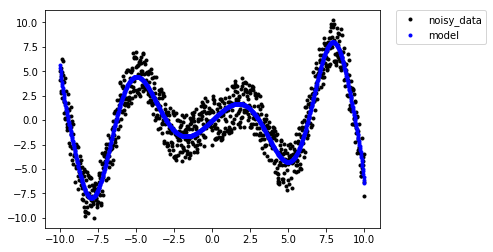

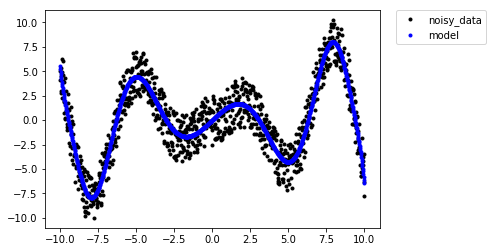

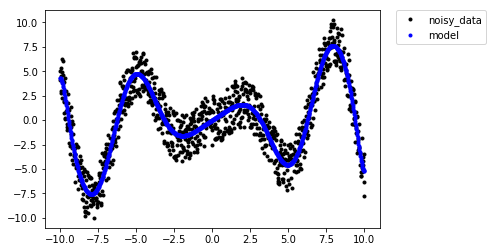

In [31]:
energies = []
for i in range(6,16):
    mod, modp = model(i, x, 1)
    energies.append(energy(mod, modp))
    plt.plot(x, y2, 'k.', label="noisy_data") # plot noisy data
    plt.plot(x, mod[0:1001], 'b.', label="model") # plot model
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## plot the energy

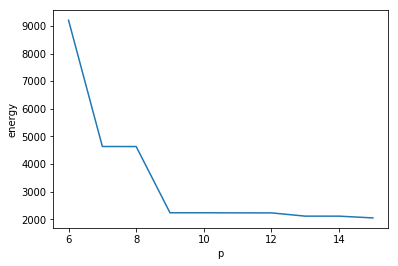

In [33]:
x_a = np.arange(6,16) # 6 ~ 15

plt.plot(x_a, energies, label= 'energy')

plt.xlabel('p')
plt.ylabel('energy')
plt.show()

## $\lambda = ...2^{-3}, 2^{-2}, 2^{-1}, 2^{0}, 2^{1}, 2^{2}, 2^{3}...$ 까지 plot    p = 15 일때

lambda: 0.0078125


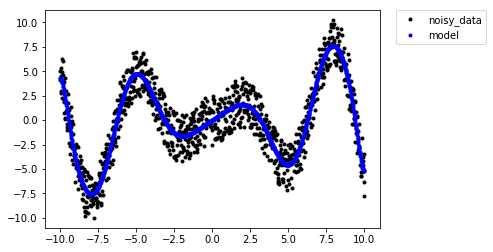

lambda: 0.015625


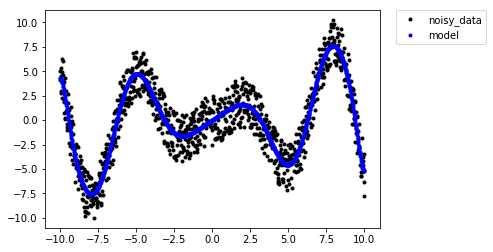

lambda: 0.03125


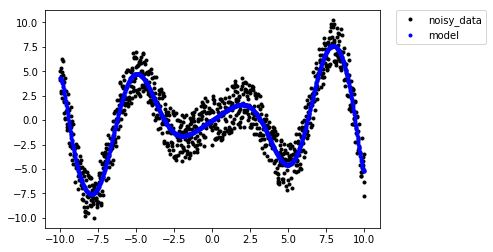

lambda: 0.0625


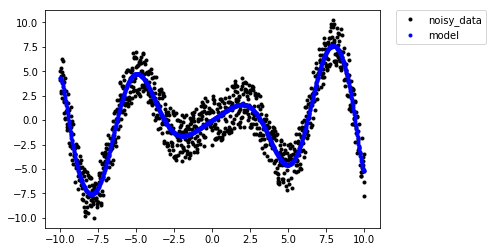

lambda: 0.125


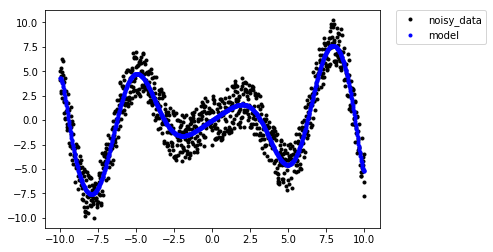

lambda: 0.25


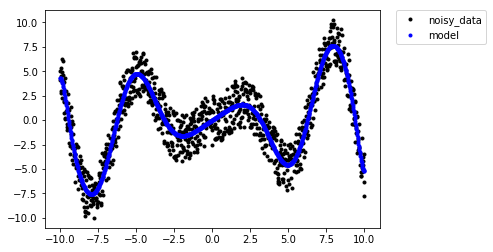

lambda: 0.5


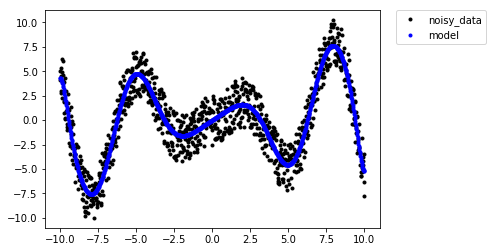

lambda: 1


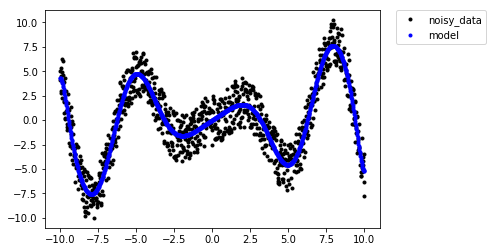

lambda: 2


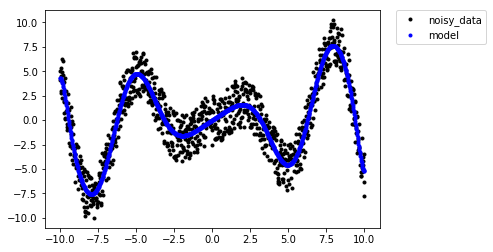

lambda: 4


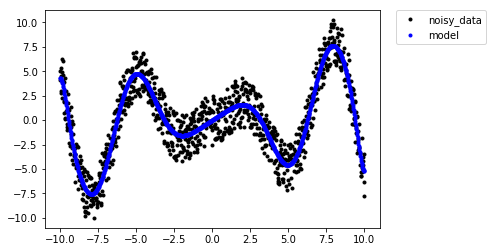

lambda: 8


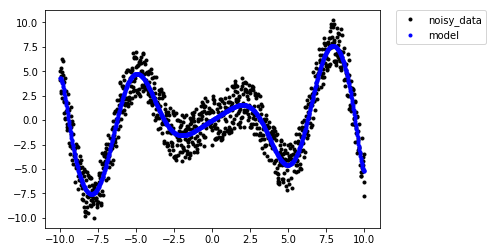

lambda: 16


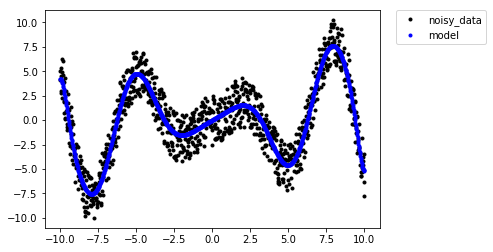

lambda: 32


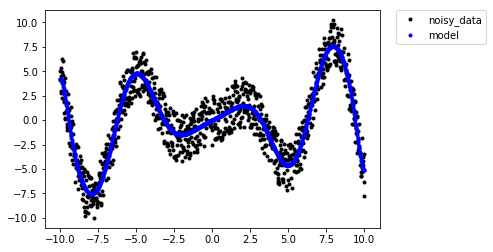

lambda: 64


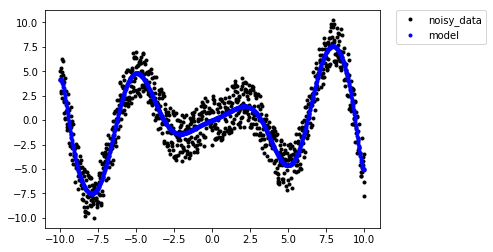

lambda: 128


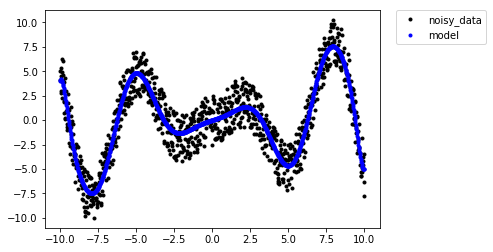

In [38]:
param_list = [2**-7, 2**-6, 2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7]
energies = []
for i in param_list:
    print("lambda: {}".format(i))
    mod, modp = model(15, x, i)
    energies.append(energy(mod, modp))
    plt.plot(x, y2, 'k.', label="noisy_data") # plot noisy data
    plt.plot(x, mod[0:1001], 'b.', label="model") # plot model
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## plot the energy

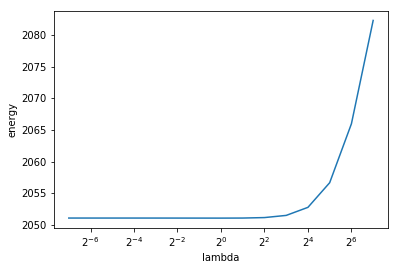

In [41]:
plt.plot(param_list, energies, label= 'energy')

plt.xscale('log', basex=2)
plt.xlabel('lambda')
plt.ylabel('energy')
plt.show()